In [79]:
import glob
from astropy.io.fits import getdata
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
neigh_x = [-1,  0, 1, -1, 0, 1, -1,  0, 1]
neigh_y = [-1, -1, -1,  0, 0,  0, +1, +1, +1]



In [31]:
def calibrate_files():

    allev = None
    for file in glob.glob('./full_mission/*'):
        if 'notime' in file:
            continue
        
        print(file)
        temperature_calibrate_phas(file)

    return allev
        

In [103]:
def read_calibrated_files(fpm='A'):
    allev = None
    for file in glob.glob('./full_mission/*'+fpm+'*notime*'):
        print(file)
        from astropy.table import Table
        evts = Table.read(file, hdu=1)
        if allev is None:
            allev = evts.to_pandas()
        else:
            allev = allev.append(evts.to_pandas(), ignore_index=True)
    return allev




In [27]:
def temperature_calibrate_phas(file):
    """
    Read in the data and apply the baseline temperature calibration
    """
    
    from astropy.io.fits import getdata
    from astropy.table import Table
    import numpy as np
    import os.path


    outfile = file.rstrip('.fits')+'_notime.fits'

    if os.path.isfile(outfile):
        return
    
    
    evts = Table.read(file, hdu=1)
    evts['PI'] = np.nan


    if 'A' in file :
        FPM = 'A'
    else:
        FPM='B'

    CALDB='/Users/bwgref/science/local/CALDB'
    gain_file = CALDB+'/data/nustar/fpm/bcf/gain/nu'+FPM+'gain20100101v007.fits'
    clc_file = CALDB+'/data/nustar/fpm/bcf/clc/nu'+FPM+'clc20100101v004.fits'

    for det in range(4):
        print(det)

        gainpar = getdata(gain_file, det + 1)
        clcpar = getdata(clc_file, det +1 )


        # Loop over all events:
        for ind in range(len(evts)):
            if evts['GRADE'][ind] != 0:
                continue
            rawx = evts['RAWX'][ind]
            rawy = evts['RAWY'][ind]
            phas = evts['PHAS'][ind]
            temp = evts['TEMP'][ind]

            for jj in range(9):
                if jj != 4:
                    continue
                thisx = rawx + neigh_x[jj]
                thisy = rawy + neigh_y[jj]
                caldb_ind = 2*(thisx *32 + thisy)
                clc_ind = (thisx *32 + thisy)
                slope = np.interp(temp, gainpar['TEMP'][caldb_ind],gainpar['SLOPE'][caldb_ind])
                offset = np.interp(temp, gainpar['TEMP'][caldb_ind],gainpar['OFFSET'][caldb_ind])

                pis_gain = phas[jj] * slope + offset

                # Skip CLC correction for multiple grades and just apply Grade-Gain Correction 
                evts['PI'][ind] = pis_gain * clcpar['GR_SLOPE'][clc_ind][0] + clcpar['GR_OFFSET'][clc_ind][0]


    #                print(rawx, rawy)
    #             thisevt = np.where( (evts['DET_ID'] == det) & 
    #                                 (evts['RAWX'] == rawx) & 
    #                                 (evts['RAWY'] == rawy) &
    #                                 (evts['GRADE'] == 0))
    #             thisevt = thisevt[0]

    #             pis = np.zeros([len(thisevt), 9])
    #             for jj in range(9):
    #                 if (thisx < 0) | (thisx > 31) | (thisy < 0) | (thisy > 31):
    #                     continue

    #                 pis = slope*evts['PHAS'][thisevt] * slope + offset
    # #               evts['PIS'][thisevt][jj] = slope*evts['PHAS'][thisevt][jj] * slope + offset

    #                 break
    #             if thisevt is not None:
    #                 break
    #         if thisevt is not None:
    #             break
    #     break
    #                evts['PI'] = slope*evts['PPHAS']
                    #                evts['PI'][thisevt] = (slope*evts['PI'][thisevt]+offset)
    evts[np.where(~np.isnan(evts['PI']))]
    evts.remove_column('PHAS')
    evts.write(outfile, format='fits')

    return

In [98]:
calibrate_files()

./full_mission/30001002001A_02.fits
./full_mission/30001002001B_02.fits
./full_mission/30001002002A_02.fits
./full_mission/30001002002B_02.fits
./full_mission/30001002003A_02.fits
./full_mission/30001002003B_02.fits
./full_mission/30001002004A_02.fits
./full_mission/30001002004B_02.fits
./full_mission/30001002005A_02.fits
./full_mission/30001002005B_02.fits
./full_mission/30001002006A_02.fits
./full_mission/30001002006B_02.fits
./full_mission/30001002007A_02.fits
./full_mission/30001002007B_02.fits
./full_mission/30001002008A_02.fits
./full_mission/30001002008B_02.fits
./full_mission/30001002009A_02.fits
./full_mission/30001002009B_02.fits
./full_mission/30001002010A_02.fits
./full_mission/30001002010B_02.fits
./full_mission/30001004001A_02.fits
./full_mission/30001004001B_02.fits
./full_mission/30001004002A_02.fits
./full_mission/30001004002B_02.fits
./full_mission/30001004003A_02.fits
./full_mission/30001004003B_02.fits
./full_mission/30001004004A_02.fits
./full_mission/30001004004B_

KeyboardInterrupt: 

In [104]:
ev = read_calibrated_files()


./full_mission/30001002001A_02_notime.fits
./full_mission/30001002002A_02_notime.fits
./full_mission/30001002003A_02_notime.fits
./full_mission/30001002004A_02_notime.fits
./full_mission/30001002005A_02_notime.fits
./full_mission/30001002006A_02_notime.fits
./full_mission/30001002007A_02_notime.fits
./full_mission/30001002008A_02_notime.fits
./full_mission/30001002009A_02_notime.fits
./full_mission/30001002010A_02_notime.fits
./full_mission/30001004001A_02_notime.fits
./full_mission/30001004002A_02_notime.fits
./full_mission/30001004003A_02_notime.fits
./full_mission/30001004004A_02_notime.fits
./full_mission/30001004005A_02_notime.fits
./full_mission/30001004006A_02_notime.fits
./full_mission/30001006001A_02_notime.fits
./full_mission/30001006002A_02_notime.fits
./full_mission/30001008001A_02_notime.fits
./full_mission/30001008002A_02_notime.fits
./full_mission/30001010001A_02_notime.fits
./full_mission/30001010002A_02_notime.fits
./full_mission/30001010003A_02_notime.fits
./full_miss

<IPython.core.display.Javascript object>


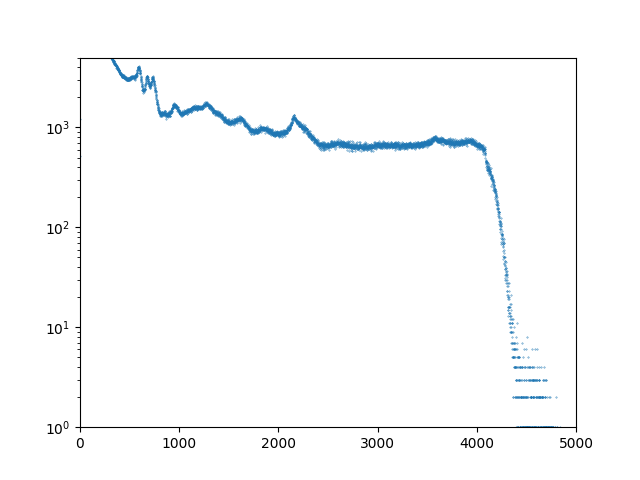

15029721


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


5010
5010


In [105]:
plt.figure()
print(len(ev))
spec, edges = np.histogram(ev.PI, range= [-10, 5000], bins = 5010)

means = 0.5 * (edges[1:len(edges)] + edges[0:len(edges)-1])
print(len(means))
print(len(spec))
plt.scatter(means, spec, s = 0.1)
plt.yscale('log') 
plt.ylim([1, 5e3])
plt.xlim([0, 5e3])
plt.ylim
plt.show()


In [106]:
len(ev)

15029721

In [109]:
ev['DT'] = ev['TIME'] - ev['TIME'].min()

In [113]:
from astropy import units as u

In [116]:
year = u.year.to(u.s)

<IPython.core.display.Javascript object>


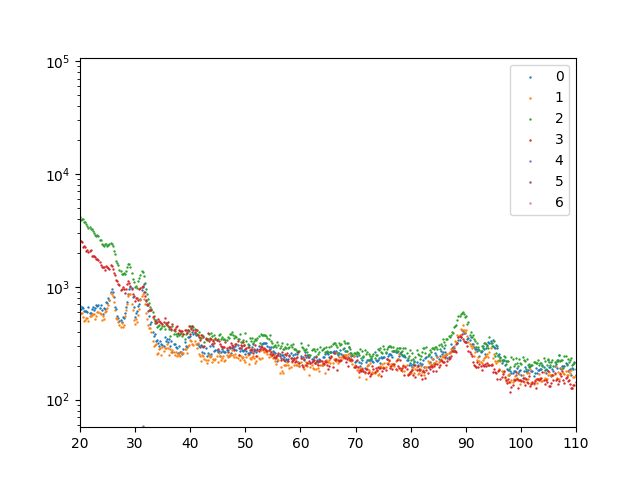

/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [159]:
plt.figure()


for yr in range(7):
    subyr = ev[
        (ev['DT'] > yr * year) &
        (ev['DT'] < (yr+1) * year) &
        (ev['DEPTHFLAG'] == 0) & 
        (ev['DET_ID'] == 0)]
    spec, edges = np.histogram(
        subyr.PI,
        range= [-10, 5000], bins = 1000)

    means = (0.5 * (edges[1:len(edges)] + edges[0:len(edges)-1]))*0.04 + 1.6
    plt.scatter(means, spec, s = 0.5, label='{}'.format(yr))
    
plt.yscale('log') 
#plt.ylim([10, 5e3])
plt.xlim([20, 110])
plt.legend()
plt.show()

In [148]:
subev = (ev['DT'] > yr * year) &
    (ev['DT'] < (yr+1) * year) &
    (ev['DEPTHFLAG'] == 0) & 
    (ev['DET_ID'] == 0)]

Index(['TIME', 'DET_ID', 'RAWX', 'RAWY', 'DEPTHFLAG', 'GRADE', 'GEOMAG',
       'SUNSHINE', 'RAM_ANGLE', 'LAT', 'LON', 'ALT', 'LIMB_ANGLE', 'SURRPI',
       'TEMP', 'PI', 'DT'],
      dtype='object')